In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [6]:
dev_club_dataframe=pd.read_csv("../csv/devclub.csv")
dev_club_dataframe.columns

Index(['EMP_ID', 'PASSPORT', 'FIRSTNAME', 'LASTNAME', 'GENDER', 'BIRTHDAY',
       'NATIONALITY', 'HIRED', 'DEPT', 'POSITION', 'STATUS', 'REGION'],
      dtype='object')

In [7]:
dev_club_dataframe

,EMP_ID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION
0,2,CDC87ETW8EQ,Burton,Gallegos,0,22-09-1960,Germany,29-10-2021,Aircraft Maintenance,Pilot,1,APAC
1,3,JUI65YBK7AF,Jada,Bender,0,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada
2,5,AZE20CSG4MU,Lillian,Reese,0,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada
3,23,NFH65BYM0VB,Armand,Horn,0,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia
4,29,CMK62UAD3VK,Rowan,Leonard,1,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia
5,33,EWD45RJW5YK,Carter,Velasquez,0,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC
6,34,BFS82MEY3CX,Selma,Bush,0,26-03-1972,Italy,10-10-2008,Flight Attendance,Airhostess,1,USA
7,50,MRC33GHJ2KW,Calvin,Roach,1,16-04-1999,Mexico,18-03-2011,Flight Attendance,Steward,1,Europe
8,66,WKV12UQC6QF,Zachery,Valentine,0,04-06-1971,Philippines,25-08-2011,Flight Attendance,Steward,1,Middle East
9,80,EUC74ENE9ZK,Ryan,Rush,0,13-06-1998,Italy,31-07-2019,Aircraft Maintenance,Pilot,1,Middle East


<AxesSubplot: ylabel='People'>

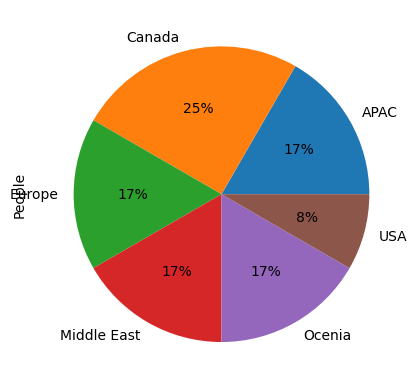

In [8]:
dev_club_dataframe.groupby(["REGION"])["FIRSTNAME"].count().plot.pie(ylabel='People',autopct='%1.0f%%')

<AxesSubplot: xlabel='NATIONALITY', ylabel='People'>

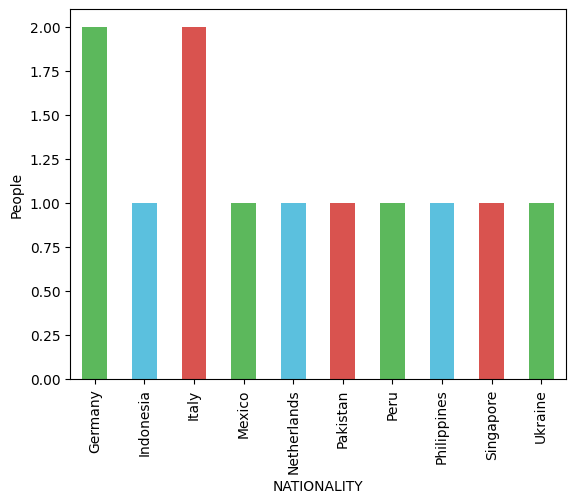

In [14]:
dev_club_dataframe.groupby(["NATIONALITY"])["EMP_ID"].count().plot.bar(ylabel='People',color=['#5cb85c','#5bc0de','#d9534f'])

In [23]:
dev_club_dataframe["BIRTHDAY"]= pd.to_datetime(dev_club_dataframe["BIRTHDAY"])
dev_club_dataframe["HIRED"]= pd.to_datetime(dev_club_dataframe["HIRED"])
dev_club_dataframe["TODAY"] = pd.to_datetime("today")
dev_club_dataframe["AGE"]=((dev_club_dataframe["TODAY"]-dev_club_dataframe["BIRTHDAY"])/ np.timedelta64(1, 'Y')).apply(np.floor)
dev_club_dataframe["EXP"]=((dev_club_dataframe["TODAY"]-dev_club_dataframe["HIRED"])/ np.timedelta64(1, 'Y')).apply(np.floor)
dev_club_dataframe

,EMP_ID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION,TODAY,AGE,EXP
0,2,CDC87ETW8EQ,Burton,Gallegos,0,1960-09-22,Germany,2021-10-29,Aircraft Maintenance,Pilot,1,APAC,2022-10-09 18:21:10.585927,62.0,0.0
1,3,JUI65YBK7AF,Jada,Bender,0,1963-05-28,Pakistan,2001-11-02,Pilot,Pilot,1,Canada,2022-10-09 18:21:10.585927,59.0,20.0
2,5,AZE20CSG4MU,Lillian,Reese,0,1982-03-12,Ukraine,2002-05-19,Flight Planning,Steward,1,Canada,2022-10-09 18:21:10.585927,40.0,20.0
3,23,NFH65BYM0VB,Armand,Horn,0,1987-05-24,Netherlands,2007-06-19,Aircraft Maintenance,Airhostess,1,Ocenia,2022-10-09 18:21:10.585927,35.0,15.0
4,29,CMK62UAD3VK,Rowan,Leonard,1,1974-07-15,Germany,2004-03-27,Aircraft Maintenance,Pilot,1,Ocenia,2022-10-09 18:21:10.585927,48.0,18.0
5,33,EWD45RJW5YK,Carter,Velasquez,0,1967-11-23,Indonesia,2005-02-27,Flight Planning,Pilot,1,APAC,2022-10-09 18:21:10.585927,54.0,17.0
6,34,BFS82MEY3CX,Selma,Bush,0,1972-03-26,Italy,2008-10-10,Flight Attendance,Airhostess,1,USA,2022-10-09 18:21:10.585927,50.0,13.0
7,50,MRC33GHJ2KW,Calvin,Roach,1,1999-04-16,Mexico,2011-03-18,Flight Attendance,Steward,1,Europe,2022-10-09 18:21:10.585927,23.0,11.0
8,66,WKV12UQC6QF,Zachery,Valentine,0,1971-04-06,Philippines,2011-08-25,Flight Attendance,Steward,1,Middle East,2022-10-09 18:21:10.585927,51.0,11.0
9,80,EUC74ENE9ZK,Ryan,Rush,0,1998-06-13,Italy,2019-07-31,Aircraft Maintenance,Pilot,1,Middle East,2022-10-09 18:21:10.585927,24.0,3.0


In [24]:
dev_club_dataframe.groupby(["REGION"]).agg({'AGE':['mean','min','max']})

AGE            
                  mean   min   max
REGION                            
APAC         58.000000  54.0  62.0
Canada       41.666667  26.0  59.0
Europe       22.500000  22.0  23.0
Middle East  37.500000  24.0  51.0
Ocenia       41.500000  35.0  48.0
USA          50.000000  50.0  50.0

<AxesSubplot: title={'center': 'Age'}, xlabel='Region', ylabel='Age'>

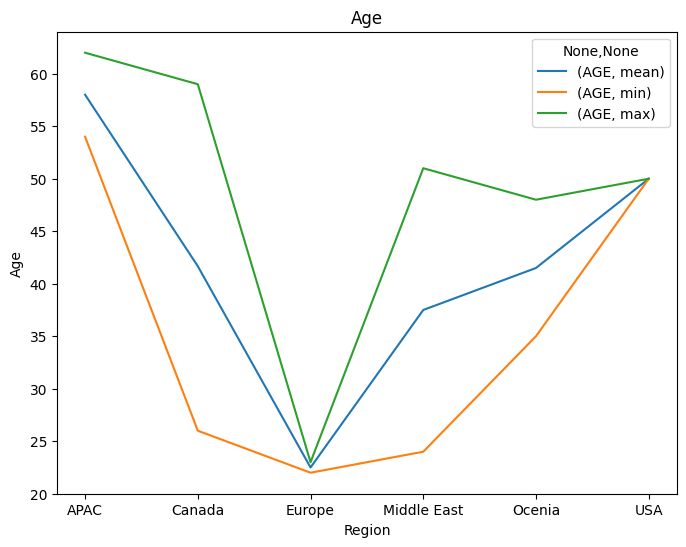

In [25]:
dev_club_dataframe.groupby(["REGION"]).agg({'AGE':['mean','min','max']}).plot(kind='line', figsize=(8, 6), title='Age', xlabel='Region', ylabel='Age', rot=0)